Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/10kev25磁场/density0018.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 3,  1, 50]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVari

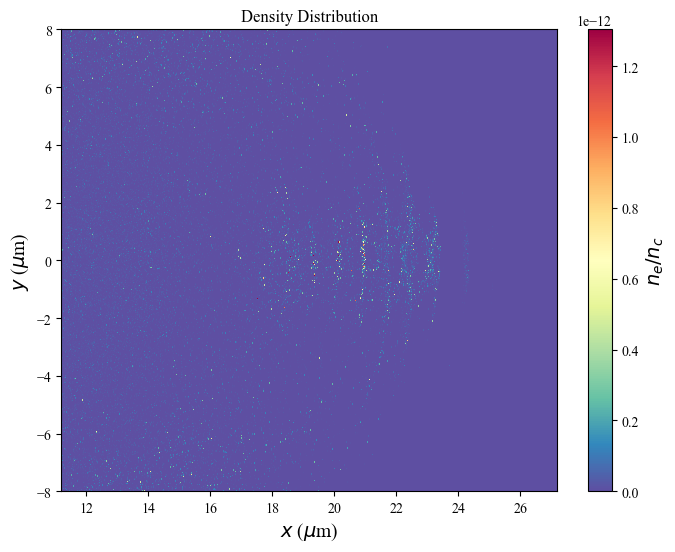

各个 x 范围内能量方差和平均能量（单位：J）:
[19.6, 20.4] μm: 平均能量 = 7.132895e-15 J, 方差 = 2.673629e-27
[20.4, 21.2] μm: 平均能量 = 1.074610e-14 J, 方差 = 5.429046e-27
[21.2, 21.9] μm: 平均能量 = 1.169516e-14 J, 方差 = 1.920297e-27
[21.9, 22.8] μm: 平均能量 = 1.088735e-14 J, 方差 = 1.419695e-27
[22.9, 23.5] μm: 平均能量 = 7.681788e-15 J, 方差 = 1.030990e-27


In [1]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/10kev25磁场'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

# ne = Density_Data.Derived_Number_Density_Photon.data / den_crit
ne = 1
ek = Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*ek

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)  # 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 500]

X, Y = np.meshgrid(x_values, y_values, indexing='ij')

# 创建图像和子图
fig, ax = plt.subplots(figsize=(8, 6))

# 显示密度图
# 设置色标范围的方式：自动或手动
auto_scale = True  # 设置为 True 时自动调整色标范围，设置为 False 时手动设置色标范围
if auto_scale:
    vmin = np.min(ne_slice) * 0.9  # 色标最小值稍微低于数据最小值
    vmax = np.max(ne_slice) * 0.5
else:
    vmin = 0.0  # 手动设置最小值
    vmax = 5.0  # 手动设置最大值

c = ax.pcolormesh(X, Y, ne_slice, shading='auto', cmap='Spectral_r', vmin=vmin, vmax=vmax)

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, label='$n_e / n_c$')
cbar.set_label('$n_e / n_c$', fontsize=14)  # 设置色标标签

# 设置标签和标题
ax.set_xlabel(r'$x$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$y$ ($\mu$m)', fontsize=14)
ax.set_title('Density Distribution')

plt.show()

# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
y_min, z_min = -2, -2  # 单位：微米
y_max, z_max = 2, 2

# 获取对应索引
y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# 定义多个 x 范围
# ranges = [(18.7, 19.7), (19.7, 20.7), (20.7, 21.7), (21.7, 22.7)]
ranges = [(19.6, 20.4),(20.4,21.2),(21.2,21.9),(21.9,22.8),(22.9,23.5)]

print("各个 x 范围内能量方差和平均能量（单位：J）:")
for idx, (x_min, x_max) in enumerate(ranges):
    # 获取对应 x 索引范围
    x_indices_range = np.where((x >= x_min) & (x <= x_max))[0]
    if len(x_indices_range) == 0:
        print(f"[{x_min}, {x_max}] μm: 索引范围为空，跳过")
        continue
    x_start = x_indices_range[0]
    x_end = x_indices_range[-1] + 1

    # 截取 ek 子区域
    subset = ek[x_start:x_end, y_start:y_end, z_start:z_end]

    # 计算方差和均值
    variance = np.var(subset)
    mean_val = np.mean(subset)

    print(f"[{x_min:.1f}, {x_max:.1f}] μm: 平均能量 = {mean_val:.6e} J, 方差 = {variance:.6e}")

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场/density0018.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVariable

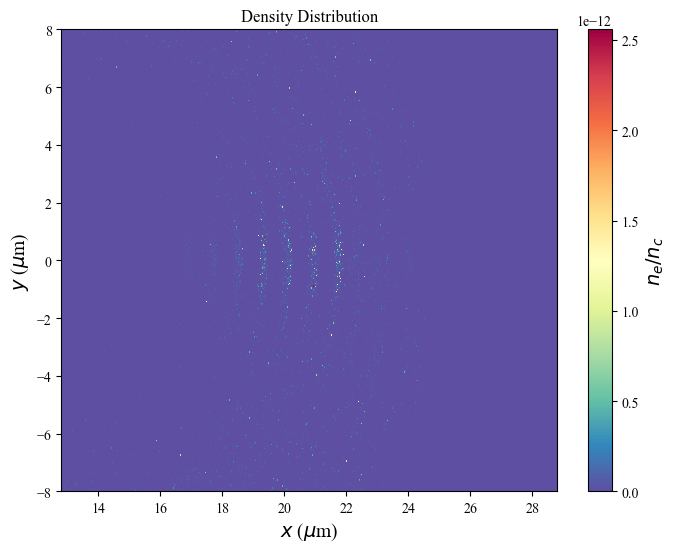

各个 x 范围内能量方差和平均能量（单位：J）:
[15.6, 16.4] μm: 平均能量 = 1.407560e-15 J, 方差 = 2.793744e-29
[16.4, 17.2] μm: 平均能量 = 2.684170e-15 J, 方差 = 1.066337e-28
[17.2, 17.9] μm: 平均能量 = 4.256866e-15 J, 方差 = 4.264472e-28
[17.9, 18.8] μm: 平均能量 = 6.205518e-15 J, 方差 = 1.279709e-27
[18.8, 19.6] μm: 平均能量 = 9.684900e-15 J, 方差 = 3.393541e-27
[19.6, 20.4] μm: 平均能量 = 1.276565e-14 J, 方差 = 6.242011e-27
[20.4, 21.2] μm: 平均能量 = 1.095414e-14 J, 方差 = 7.164178e-27
[21.2, 22.0] μm: 平均能量 = 1.473107e-14 J, 方差 = 8.625105e-27
[22.0, 22.7] μm: 平均能量 = 6.222472e-15 J, 方差 = 1.243491e-27
[22.7, 23.5] μm: 平均能量 = 4.401887e-15 J, 方差 = 6.671421e-28
[23.5, 24.4] μm: 平均能量 = 2.389950e-15 J, 方差 = 1.751591e-28


In [2]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场'  # 数据文件所在目录
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

# ne = Density_Data.Derived_Number_Density_Photon.data / den_crit
ne = 1
ek = Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*ek

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)  # 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 500]

X, Y = np.meshgrid(x_values, y_values, indexing='ij')

# 创建图像和子图
fig, ax = plt.subplots(figsize=(8, 6))

# 显示密度图
# 设置色标范围的方式：自动或手动
auto_scale = True  # 设置为 True 时自动调整色标范围，设置为 False 时手动设置色标范围
if auto_scale:
    vmin = np.min(ne_slice) * 0.9  # 色标最小值稍微低于数据最小值
    vmax = np.max(ne_slice) * 0.5
else:
    vmin = 0.0  # 手动设置最小值
    vmax = 5.0  # 手动设置最大值

c = ax.pcolormesh(X, Y, ne_slice, shading='auto', cmap='Spectral_r', vmin=vmin, vmax=vmax)

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, label='$n_e / n_c$')
cbar.set_label('$n_e / n_c$', fontsize=14)  # 设置色标标签

# 设置标签和标题
ax.set_xlabel(r'$x$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$y$ ($\mu$m)', fontsize=14)
ax.set_title('Density Distribution')

plt.show()

# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
y_min, z_min = -2, -2  # 单位：微米
y_max, z_max = 2, 2

# 获取对应索引
y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# 定义多个 x 范围
# ranges = [(18.7, 19.7), (19.7, 20.7), (20.7, 21.7), (21.7, 22.7)]
ranges = [(15.6, 16.4),(16.4,17.2),(17.2,17.9),(17.9,18.8),(18.8,19.6),(19.6,20.4),(20.4,21.2),(21.2,22),
          (22,22.7),(22.7,23.5),(23.5,24.4)]

print("各个 x 范围内能量方差和平均能量（单位：J）:")
for idx, (x_min, x_max) in enumerate(ranges):
    # 获取对应 x 索引范围
    x_indices_range = np.where((x >= x_min) & (x <= x_max))[0]
    if len(x_indices_range) == 0:
        print(f"[{x_min}, {x_max}] μm: 索引范围为空，跳过")
        continue
    x_start = x_indices_range[0]
    x_end = x_indices_range[-1] + 1

    # 截取 ek 子区域
    subset = ek[x_start:x_end, y_start:y_end, z_start:z_end]

    # 计算方差和均值
    variance = np.var(subset)
    mean_val = np.mean(subset)

    print(f"[{x_min:.1f}, {x_max:.1f}] μm: 平均能量 = {mean_val:.6e} J, 方差 = {variance:.6e}")

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/density0016.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVariable'> [1500,

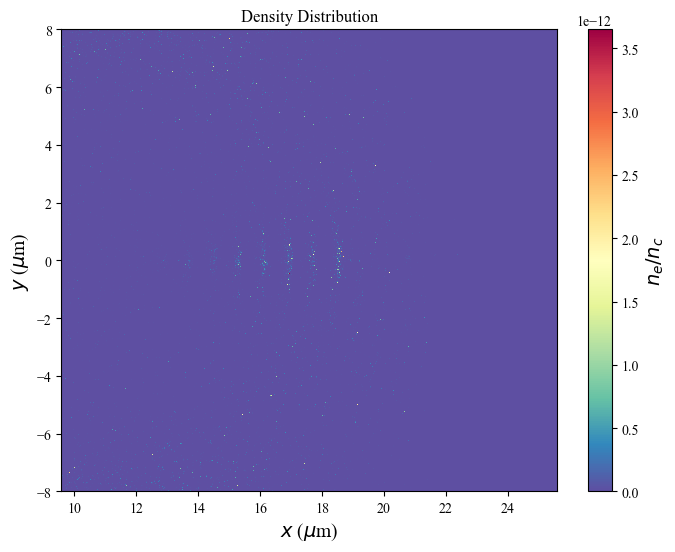

各个 x 范围内能量方差和平均能量（单位：J）:
[15.7, 16.4] μm: 平均能量 = 1.324524e-14 J, 方差 = 3.354619e-27
[16.4, 17.2] μm: 平均能量 = 1.573799e-14 J, 方差 = 5.685887e-27
[17.2, 17.9] μm: 平均能量 = 1.592158e-14 J, 方差 = 8.490943e-27
[17.9, 18.8] μm: 平均能量 = 1.710295e-14 J, 方差 = 7.950992e-27
[18.8, 19.5] μm: 平均能量 = 9.497004e-15 J, 方差 = 1.790875e-27
[19.5, 20.4] μm: 平均能量 = 6.474036e-15 J, 方差 = 9.169145e-28
[20.4, 21.2] μm: 平均能量 = 4.205082e-15 J, 方差 = 3.314235e-28


In [7]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 16

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Photon.data / den_crit
ek = Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*ek

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)  # 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 500]

X, Y = np.meshgrid(x_values, y_values, indexing='ij')

# 创建图像和子图
fig, ax = plt.subplots(figsize=(8, 6))

# 显示密度图
# 设置色标范围的方式：自动或手动
auto_scale = True  # 设置为 True 时自动调整色标范围，设置为 False 时手动设置色标范围
if auto_scale:
    vmin = np.min(ne_slice) * 0.9  # 色标最小值稍微低于数据最小值
    vmax = np.max(ne_slice) * 0.5
else:
    vmin = 0.0  # 手动设置最小值
    vmax = 5.0  # 手动设置最大值

c = ax.pcolormesh(X, Y, ne_slice, shading='auto', cmap='Spectral_r', vmin=vmin, vmax=vmax)

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, label='$n_e / n_c$')
cbar.set_label('$n_e / n_c$', fontsize=14)  # 设置色标标签

# 设置标签和标题
ax.set_xlabel(r'$x$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$y$ ($\mu$m)', fontsize=14)
ax.set_title('Density Distribution')

plt.show()

# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
y_min, z_min = -2, -2  # 单位：微米
y_max, z_max = 2, 2

# 获取对应索引
y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# 定义多个 x 范围
ranges = [(15.7, 16.4), (16.4, 17.2), (17.2, 17.9), 
          (17.9, 18.8), (18.8, 19.5), (19.5, 20.4), (20.4, 21.2)]

print("各个 x 范围内能量方差和平均能量（单位：J）:")
for idx, (x_min, x_max) in enumerate(ranges):
    # 获取对应 x 索引范围
    x_indices_range = np.where((x >= x_min) & (x <= x_max))[0]
    if len(x_indices_range) == 0:
        print(f"[{x_min}, {x_max}] μm: 索引范围为空，跳过")
        continue
    x_start = x_indices_range[0]
    x_end = x_indices_range[-1] + 1

    # 截取 ek 子区域
    subset = ek[x_start:x_end, y_start:y_end, z_start:z_end]

    # 计算方差和均值
    variance = np.var(subset)
    mean_val = np.mean(subset)

    print(f"[{x_min:.1f}, {x_max:.1f}] μm: 平均能量 = {mean_val:.6e} J, 方差 = {variance:.6e}")

